# 1 Business Understanding

## 1.1 Цель
Предсказать качество вина ("плохое", "хорошее", "очень хорошее"), основываясь на его характеристиках.

Решенная задача обладает следующей ценностью:
- Дает виноделу понять науку о виноделии и привести свой продукт в соответствие с потребностями и желаниями потребителей.
- Дает представление о том, на каких областях винодел должен сосредоточить свое внимание.
- Дает виноделу подсказку о вероятности, предпочтениях и желании потребителей покупать вино с определенной физико-химической смесью.
- Даст производителям преимущество перед другими конкурентами.

## 1.2 Описание
Набор данных о качестве вина представлен по ссылке https://www.kaggle.com/datasets/rajyellow46/wine-quality.

Набор данных имеет оценку качества, сформулированную экспертами путем присвоения значений в диапазоне от 3 до 8, где три означает ужасное, а восемь означает отличное. Входные переменные на основе физико-химического теста в наборах данных:

- тип вина (красное или белое)
- Фиксированная кислотность 
- Летучая кислотность
- Лимонная кислота
- Остаточный сахар
- Хлориды
- Свободный диоксид серы
- Общий диоксид серы
- Плотность
- pH
- Сульфаты
- Спирт

# 2 Data Understanding

Для достижения указанных целей расмотрим наши данные

## 2.1 Импорт библиотек

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from imblearn.over_sampling import SMOTE

from scipy.stats import pearsonr

from sklearn.model_selection import train_test_split, KFold, cross_val_score, RandomizedSearchCV

##2.2 Загрузка данных

In [ ]:
df = pd.read_csv('winequalityN.csv')

df.shape

(6497, 13)

##2.3 Статистика и визуализация

Посмотрим, как выглядят наши данные

In [ ]:
df.head(10)

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
5,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
6,white,6.2,0.32,0.16,7.0,0.045,30.0,136.0,0.9949,3.18,0.47,9.6,6
7,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
8,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
9,white,8.1,0.22,0.43,1.5,0.044,28.0,129.0,0.9938,3.22,0.45,11.0,6


###2.3.1 Взглянем на некоторую ключевую информацию о переменных

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [ ]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6487.000000,6489.000000,6494.000000,6495.000000,6495.000000,6497.000000,6497.000000,6497.000000,6488.000000,6493.000000,6497.000000,6497.000000
mean,7.216579,0.339691,0.318722,5.444326,0.056042,30.525319,115.744574,0.994697,3.218395,0.531215,10.491801,5.818378
std,1.296750,0.164649,0.145265,4.758125,0.035036,17.749400,56.521855,0.002999,0.160748,0.148814,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


Здесь можно заметить, что присутствуют пропущенные значения, а также есть выбросы.

### 2.3.2 Тепловая карта корреляции может дать нам понимание того, какие переменные важны

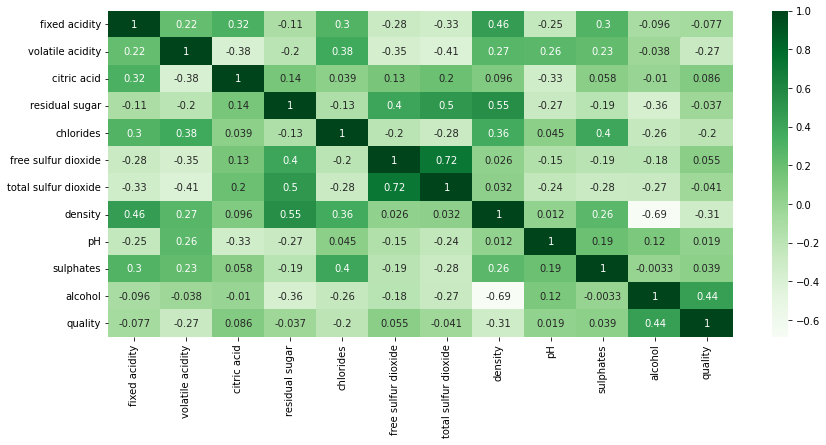

In [ ]:
plt.figure(figsize=[14,6])
sns.heatmap(df.corr(), annot = True,cmap = 'Greens')

###2.3.3 Гистограммы распределения параметров

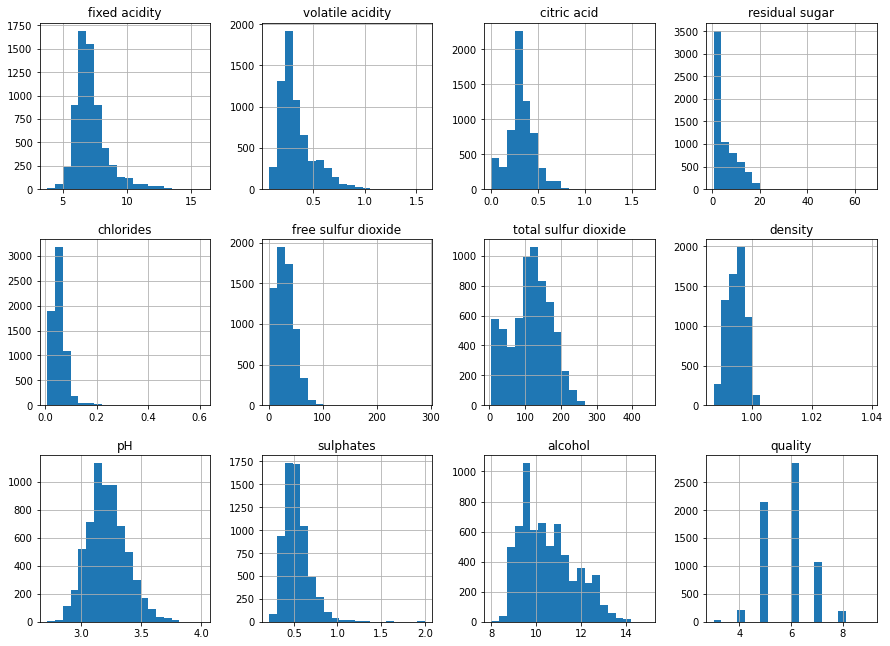

In [ ]:
df.hist(figsize=(15,15), layout=(4,4), bins=20);

# 3 Data Preparation

##3.1 Работа с пропусками в параметрах

Как видно, наши данные имеют пропуски в значениях:

In [ ]:
df.isnull().sum()

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

Классические методы работы с пропусками - это замена их на медианные, средние или смоделированные значения. Или, если есть соображения, что такие данные не окажут существенного влияния, просто исключить из анализа:

In [ ]:
df = df.dropna()

##3.2 Future Selection - отбор признаков

Рассмотрим, какую корреляцию имеют на результирующий параметр quality (качество) остальные переменные, для этого рассчитаем коэффициент Пирсона и отобразим графически:

In [ ]:
corr_pearson = {column: pearsonr(df[column], df.quality)[0] 
                for column in df.drop(columns=['type', 'quality']).columns}

corr_pearson = {k:v for k,v in 
                sorted(corr_pearson.items(), key = lambda x: x[1], reverse=True)}
corr_pearson

{'alcohol': 0.4446368664073696,
 'chlorides': -0.20055317201958378,
 'citric acid': 0.08492613543301443,
 'density': -0.3044467680218181,
 'fixed acidity': -0.07617378049455369,
 'free sulfur dioxide': 0.05492413455054756,
 'pH': 0.018402755244292784,
 'residual sugar': -0.034653782007818004,
 'sulphates': 0.0390536356696347,
 'total sulfur dioxide': -0.04159801196478108,
 'volatile acidity': -0.26667748378574685}

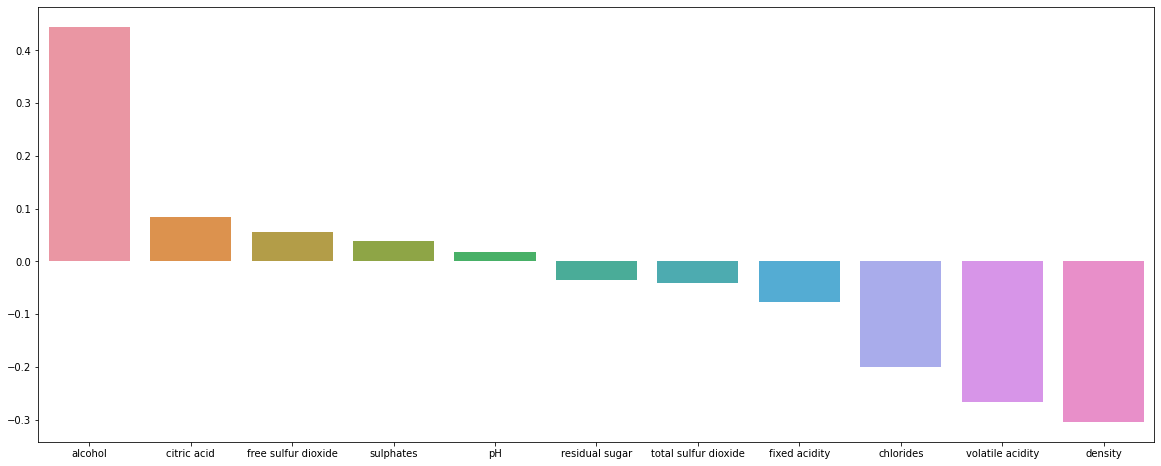

In [ ]:
plt.figure(figsize=(20,8))
sns.barplot(x=list(corr_pearson.keys()), y=list(corr_pearson.values()))

plt.show()

Параметры с незначительной корреляцией (например pH) можно было бы не включать в анализ.

##3.3 Работа с выбросами

Рассмотрим диаграммы размаха для каждой переменной:

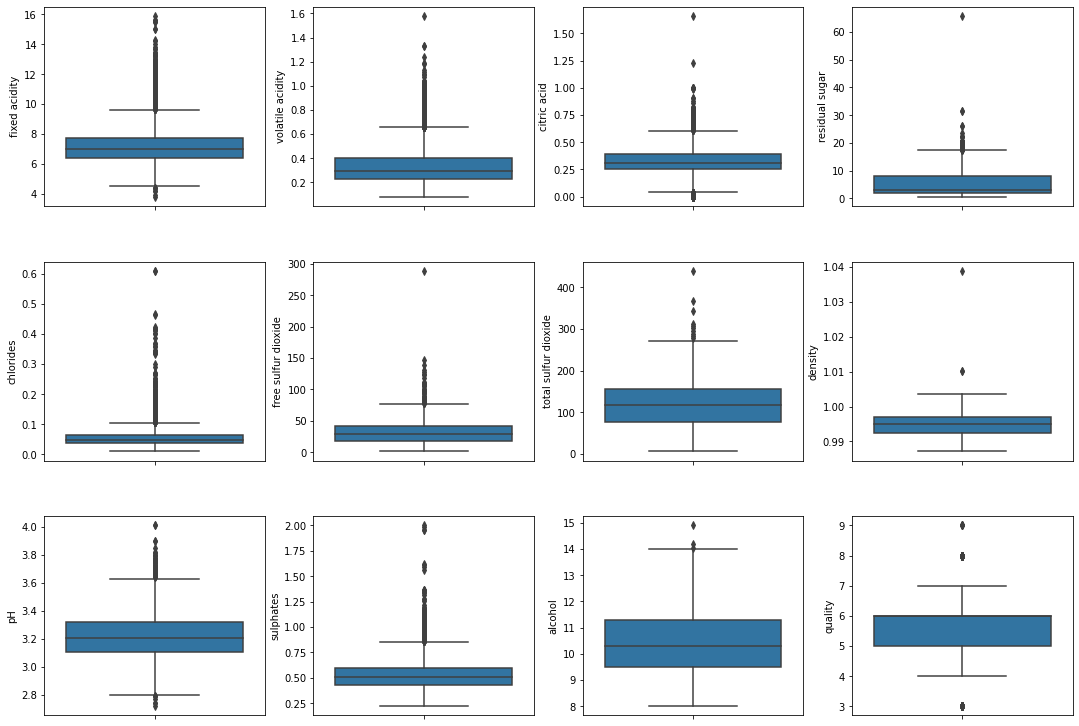

In [ ]:
fig, axs = plt.subplots(ncols=4, nrows=3, figsize=(15, 10))
axs = axs.flatten()

for index,col in enumerate(df.drop(columns='type').columns):
  sns.boxplot(y=df[col], data=df, ax=axs[index])
  
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

Произведем следующую работу с выбросами по нехитрому алгоритму: выбросы выше определенного порога заменим на среднее значение:

In [ ]:
df.loc[df['citric acid']>1.1,'citric acid'] = np.mean(df["citric acid"])
df.loc[df['residual sugar']>60,'residual sugar'] = np.mean(df["residual sugar"])
df.loc[df['chlorides']>0.55,'chlorides'] = np.mean(df["chlorides"])
df.loc[df['free sulfur dioxide']>250,'free sulfur dioxide'] = np.mean(df["free sulfur dioxide"])
df.loc[df['total sulfur dioxide']>330,'total sulfur dioxide'] = np.mean(df["total sulfur dioxide"])
df.loc[df['density']>1.0,'density'] = np.mean(df["density"])
df.loc[df['sulphates']>1.45,'sulphates'] = np.mean(df["sulphates"])

##3.4 Категориальные переменные

У нас есть переменная type, отвечающая за тип вина - белое или красное, как очевидно, она категориальная:

In [ ]:
df.type.value_counts()

white    4870
red      1593
Name: type, dtype: int64

Преобразуем её в числовую:

In [ ]:
df = pd.get_dummies(df,drop_first=True)
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type_white
0,7.0,0.270,0.36,20.7,0.045,45.0,170.0,0.994698,3.00,0.45,8.8,6,1
1,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.994000,3.30,0.49,9.5,6,1
2,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.995100,3.26,0.44,10.1,6,1
3,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.995600,3.19,0.40,9.9,6,1
4,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.995600,3.19,0.40,9.9,6,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6491,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.996510,3.42,0.82,9.5,6,0
6492,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.994900,3.45,0.58,10.5,5,0
6494,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.995740,3.42,0.75,11.0,6,0
6495,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.995470,3.57,0.71,10.2,5,0


##3.5 Feature Engineering - конструирование признаков

Рассмотрим внимание нашу результирующую переменную о качестве вина, данную в числовом выражении:

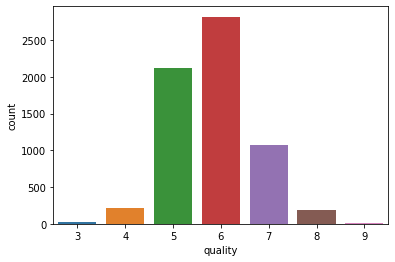

In [ ]:
sns.countplot(x='quality', data=df);

Решать задачу предсказания оценки (от 3 до 9) нерационально, поскольку для оценок "3" и "9" слишком мало наблюдений. Вместо этого мы можем перейти к задаче предсказания "категории вина", например на основе триады "плохое", "хорошее", "очень хорошее", если введём правило для объединения оценок качества в категорию вина:

In [ ]:
# as we can see from the above table some wine quality of 6 and 5 is white and some as red
# considering the best quality value of wine is 7
binned = {3: 'Bad', 4: 'Bad', 5: 'Good', 6: 'Good', 7: 'Very Good', 8: 'Very Good', 9: 'Very Good'}
df['quality'] = df['quality'].map(binned)

Полученные категории:

In [ ]:
df.quality.value_counts()

Good         4948
Very Good    1271
Bad           244
Name: quality, dtype: int64

#4 Data Modeling - моделирование

##4.1 Разбиение выборки на train и test

In [ ]:
X = df.drop(['quality'], axis =1)
y = df['quality']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0, stratify=df.quality)

In [ ]:
y_train.value_counts()

Good         3711
Very Good     953
Bad           183
Name: quality, dtype: int64

Учитывая, что у нас несбалансированные классы, можно применить технологию выравнивания наблюдений относительно предсказываемой категории:

In [ ]:
#smote = SMOTE()
#X_train, y_train = smote.fit_resample(X_train, y_train)

#y_train.value_counts()

Good         3711
Very Good    3711
Bad          3711
Name: quality, dtype: int64

Осуществляем шкалирование данные

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

##4.2 Выбор модели

Для решения задачи будем использовать следующие модели, из которых выберем затем лучшую:

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [ ]:
# Словарь с моделями
models = {
    '1. LogisticRegression': LogisticRegression(multi_class='multinomial', solver='newton-cg'),
    '2. KNeighborsClassifier': KNeighborsClassifier(),
    '3. SVC': SVC(),
    '4. DecisionTreeClassifier': DecisionTreeClassifier(),
    '5. RandomForestClassifier': RandomForestClassifier(random_state=42),
    '6. LinearDiscriminantAnalysis': LinearDiscriminantAnalysis(),
}

In [ ]:
# чтобы не городить много однотипных вызовов функций, сделаем в генераторе 
gen_models = {name_model:
            models[name_model].fit(X_train,y_train).score(X_test,y_test) for name_model in models}
gen_models

{'1. LogisticRegression': 0.7790841584158416,
 '2. KNeighborsClassifier': 0.8094059405940595,
 '3. SVC': 0.7889851485148515,
 '4. DecisionTreeClassifier': 0.7883663366336634,
 '5. RandomForestClassifier': 0.8502475247524752,
 '6. LinearDiscriminantAnalysis': 0.7797029702970297}

По итогам выбираем модель RandomForestClassifier, показавшую лучший результат.

##4.3 Обучение модели

In [ ]:
rf = RandomForestClassifier(random_state=42)
folds = KFold(n_splits=5, shuffle=True, random_state=42)
score = cross_val_score(estimator=rf, X=X_train, y=y_train, scoring='accuracy', cv=folds, n_jobs=-1)
print(f'Процент точности на k-разбиениях: {score}')
print(f'Среднее точности: {score.mean()}')

Процент точности на k-разбиениях: [0.8257732  0.83814433 0.83591331 0.86171311 0.84520124]
Среднее точности: 0.8413490366303872


Сделаем поиск по параметрам модели, может, удастся улучшить score

In [ ]:
parameters = {'max_depth': [None, 3,5,7,9,12],
             'max_features': ['auto',2,3,4,5,9,10,12],
              'min_samples_leaf': [1,2,3,4]}

rcv = RandomizedSearchCV(estimator=rf, param_distributions=parameters, n_iter=10, n_jobs=-1,
                        scoring='accuracy', cv=folds, verbose=1)

rcv.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
                   estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
                   param_distributions={'max_depth': [None, 3, 5, 7, 9, 12],
                                        'max_features': ['auto', 2, 3, 4, 5, 9,
                                                         10, 12],
                                        'min_samples_leaf': [1, 2, 3, 4]},
                   scoring='accuracy', verbose=1)

Наша итоговая модель:

In [ ]:
model = rcv.best_estimator_
rcv.best_params_

{'max_depth': None, 'max_features': 3, 'min_samples_leaf': 1}

##4.4 Model Evaluation - Оценка модели

В этом разделе определяется насколько разработанная модель отвечает успеху бизнес-цели.

Оценим как модель справляется с данными тестовой выборки:

In [ ]:
model.score(X_test, y_test)

0.8502475247524752

85% вполне неплохой результат.

#5 Deploment Stage - Развертывание

Теперь на основе построенной модели можно развернуть выдачу оценки для любого нового вина с произвольными параметрами.

Спроектируем параметры "нового" вина и посомтрим, какую оценку выдает модель:

In [ ]:
pH = 3
alcohol = 12
type_white = 1

Xnew = pd.DataFrame(columns=df.drop(['quality'], axis=1).columns,
                    data=[[7.8, 0.22, 0.99, 2.0, 0.01, 9.0, 18.0, 0.9968, pH, 1.8, alcohol, type_white]])

Сделаем шкалирование:

In [ ]:
Xnew = scaler.transform(Xnew)

И оценка для нового вина:

In [ ]:
model.predict(Xnew)

array(['Good'], dtype=object)

Таким образом, для целей бизнеса есть ориентир: работающая модель с хорошей предсказательной силой, которую можно использовать для оценки новых вин, когда известны их параметры.